## 1. Introduce

## 2. Import library

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Supaya pesan warning tidak muncul,maka diignore
import warnings
warnings.filterwarnings('ignore')

## 3. Data Loading

In [2]:
# membaca dataset
df_cc = pd.read_csv('C:/Users/HP/OneDrive/Documents/Kampus Merdeka/Study Independen/Final Project 4/CC GENERAL.csv')

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
# melihat data 5 baris teratas
df_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
# mengecek jumlah baris dan kolom pada data
df_cc.shape

(8950, 18)

In [7]:
# mengecek tipe data
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df_cc.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [9]:
df_cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## 4. Data Cleaning

In [10]:
# melihat jumlah data yang memiliki duplikat
df_cc.duplicated().sum()

0

In [11]:
# melihat jumalah nilai missing value
df_cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
# mengisi missing value pada kolom minimum payments dan credit limit dengan median
df_cc['MINIMUM_PAYMENTS'].fillna(df_cc['MINIMUM_PAYMENTS'].median(),inplace=True)
df_cc['CREDIT_LIMIT'].fillna(df_cc['CREDIT_LIMIT'].median(),inplace=True)
df_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
# menghapus kolom cust_id karena tidak diperlukan
df_cc = df_cc.drop('CUST_ID', axis=1)
df_cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
# merubah nama pada setiap kolom
df_cc = df_cc.rename(columns={'BALANCE':'Saldo', 'BALANCE_FREQUENCY':'Frekuensi_Saldo', 'PURCHASES':'Pembelian', 
                        'ONEOFF_PURCHASES':'Pembelian_Oneoff', 'INSTALLMENTS_PURCHASES':'Pembelian_Angsuran',
                        'CASH_ADVANCE':'Penarikan_Tunai', 'PURCHASES_FREQUENCY':'Frekuensi_Pembelian',
                        'ONEOFF_PURCHASES_FREQUENCY':'Frekuensi_Pembelian_Oneoff', 
                        'PURCHASES_INSTALLMENTS_FREQUENCY':'Frekuensi_Pembelian_Angsuran', 
                        'CASH_ADVANCE_FREQUENCY':'Frekuensi_Penarikan_Tunai', 'CASH_ADVANCE_TRX':'Penarikan_Tunai_TRX', 
                        'PURCHASES_TRX':'Pembelian_TRX', 'CREDIT_LIMIT':'Batas_Kredit', 'PAYMENTS':'Pembayaran',
                        'MINIMUM_PAYMENTS':'Minimal_Pembayaran', 'PRC_FULL_PAYMENT':'Pembayaran_Full_PRC', 
                        'TENURE':'Jangka_Waktu'})

df_cc.head()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Oneoff,Pembelian_Angsuran,Penarikan_Tunai,Frekuensi_Pembelian,Frekuensi_Pembelian_Oneoff,Frekuensi_Pembelian_Angsuran,Frekuensi_Penarikan_Tunai,Penarikan_Tunai_TRX,Pembelian_TRX,Batas_Kredit,Pembayaran,Minimal_Pembayaran,Pembayaran_Full_PRC,Jangka_Waktu
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
df_cc.columns

Index(['Saldo', 'Frekuensi_Saldo', 'Pembelian', 'Pembelian_Oneoff',
       'Pembelian_Angsuran', 'Penarikan_Tunai', 'Frekuensi_Pembelian',
       'Frekuensi_Pembelian_Oneoff', 'Frekuensi_Pembelian_Angsuran',
       'Frekuensi_Penarikan_Tunai', 'Penarikan_Tunai_TRX', 'Pembelian_TRX',
       'Batas_Kredit', 'Pembayaran', 'Minimal_Pembayaran',
       'Pembayaran_Full_PRC', 'Jangka_Waktu'],
      dtype='object')

In [16]:
# melihat jumlah nilai dari setiap atribut
for col in df_cc.columns:
    print(col, ' : ')
    print(df_cc[col].value_counts())
    print(" ")
    print(" ")

Saldo  : 
0.000000       80
1100.941072     1
40.074484       1
2093.844656     1
179.765708      1
               ..
1139.691004     1
3494.152843     1
2388.503738     1
2153.498372     1
510.233775      1
Name: Saldo, Length: 8871, dtype: int64
 
 
Frekuensi_Saldo  : 
1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.400000      10
0.555556      10
0.300000       9
0.200000       9
0.375000       9
0.125000       9
0.285714       8
0.100000       8
0.250000       8
0.444444       7
0.166667       7
0.142857       7
0.600000       6
0.111111       5
0.222222       5
0.428571      

## 5. EDA

In [17]:
# melihat statistik deskriptif pada data
df_cc.describe()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Oneoff,Pembelian_Angsuran,Penarikan_Tunai,Frekuensi_Pembelian,Frekuensi_Pembelian_Oneoff,Frekuensi_Pembelian_Angsuran,Frekuensi_Penarikan_Tunai,Penarikan_Tunai_TRX,Pembelian_TRX,Batas_Kredit,Pembayaran,Minimal_Pembayaran,Pembayaran_Full_PRC,Jangka_Waktu
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [18]:
# melihat nilai minimum pada setiap data

minimum = df_cc.min()
minimum

Saldo                            0.000000
Frekuensi_Saldo                  0.000000
Pembelian                        0.000000
Pembelian_Oneoff                 0.000000
Pembelian_Angsuran               0.000000
Penarikan_Tunai                  0.000000
Frekuensi_Pembelian              0.000000
Frekuensi_Pembelian_Oneoff       0.000000
Frekuensi_Pembelian_Angsuran     0.000000
Frekuensi_Penarikan_Tunai        0.000000
Penarikan_Tunai_TRX              0.000000
Pembelian_TRX                    0.000000
Batas_Kredit                    50.000000
Pembayaran                       0.000000
Minimal_Pembayaran               0.019163
Pembayaran_Full_PRC              0.000000
Jangka_Waktu                     6.000000
dtype: float64

In [19]:
# melihat nilai maximum pada setiap data

maximum = df_cc.max()
maximum

Saldo                           19043.13856
Frekuensi_Saldo                     1.00000
Pembelian                       49039.57000
Pembelian_Oneoff                40761.25000
Pembelian_Angsuran              22500.00000
Penarikan_Tunai                 47137.21176
Frekuensi_Pembelian                 1.00000
Frekuensi_Pembelian_Oneoff          1.00000
Frekuensi_Pembelian_Angsuran        1.00000
Frekuensi_Penarikan_Tunai           1.50000
Penarikan_Tunai_TRX               123.00000
Pembelian_TRX                     358.00000
Batas_Kredit                    30000.00000
Pembayaran                      50721.48336
Minimal_Pembayaran              76406.20752
Pembayaran_Full_PRC                 1.00000
Jangka_Waktu                       12.00000
dtype: float64

#### Melihat pengguna kartu kredit berdasarkan jangka waktu yang diambil

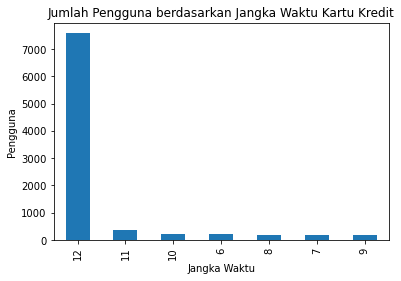

In [20]:
df_cc['Jangka_Waktu'].value_counts().plot.bar()
plt.title('Jumlah Pengguna berdasarkan Jangka Waktu Kartu Kredit')
plt.ylabel('Pengguna')
plt.xlabel('Jangka Waktu')
plt.show()

Dapat dilihat dari visualisasi data diatas bahwa lebih banyak pengguna yang mengambil jangka waktu kredit dalam waktu 12 bulan dengan jumlah pengguna diatas 7000 orang.

#### Melihat batas kredit berdasarkan jangka waktu kredit 

In [21]:
df_kredit = df_cc.pivot_table(
    index='Jangka_Waktu',
    values='Batas_Kredit',
    aggfunc='mean'
)
df_kredit

,Batas_Kredit
Jangka_Waktu,
6,3002.549020
7,2567.631579
8,2973.724490
9,2977.904762
10,3871.610169
11,4141.232877
12,4693.331329


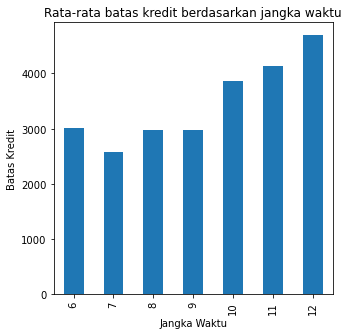

In [22]:
# visualisasi batas kredit berdasarkan jangka waktu

df_kredit.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Rata-rata batas kredit berdasarkan jangka waktu')
plt.ylabel('Batas Kredit')
plt.xlabel('Jangka Waktu')
plt.show()

Dari data diatas dapat diketahui bahwa pengguna yang mengambil layanan kartu kredit dengan jangka waktu lebih lama akan mendapatkan batas kredit yang lebih besar.

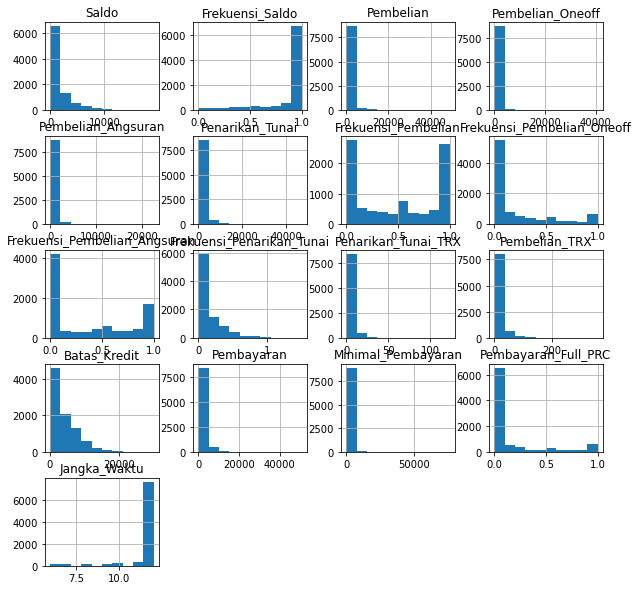

In [23]:
# Histogram data
df_cc.hist(figsize=(10,10))

plt.show()

In [24]:
# melihat korelasi data
df_cc.corr()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Oneoff,Pembelian_Angsuran,Penarikan_Tunai,Frekuensi_Pembelian,Frekuensi_Pembelian_Oneoff,Frekuensi_Pembelian_Angsuran,Frekuensi_Penarikan_Tunai,Penarikan_Tunai_TRX,Pembelian_TRX,Batas_Kredit,Pembayaran,Minimal_Pembayaran,Pembayaran_Full_PRC,Jangka_Waktu
Saldo,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397920,-0.318959,0.072692
Frekuensi_Saldo,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131181,-0.095082,0.119776
Pembelian,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095789,0.180379,0.086288
Pembelian_Oneoff,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050256,0.132763,0.064150
Pembelian_Angsuran,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134019,0.182569,0.086143
Penarikan_Tunai,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140747,-0.152935,-0.068312
Frekuensi_Pembelian,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006154,0.305802,0.061506
Frekuensi_Pembelian_Oneoff,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027311,0.157531,0.082466
Frekuensi_Pembelian_Angsuran,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032055,0.250087,0.073275
Frekuensi_Penarikan_Tunai,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.100616,-0.249773,-0.133372


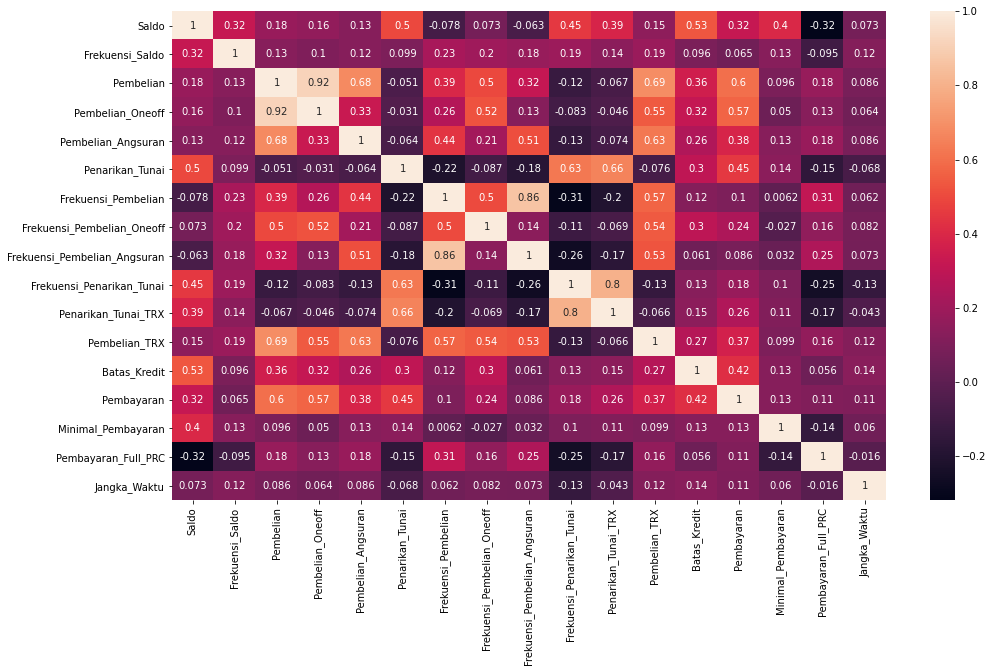

In [25]:
# melihat korelasi antar data dalam heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(df_cc.corr(), annot=True)
plt.show()

Dari heatmap diatas dapat diketahui korelasi yang cukup tinggi untuk setiap kolom, yaitu :
- Pembelian dengan Pembelian Oneoff dengan nilai korelasi 0.92
- Frekuensi Pembelian dengan Frekuensi Pembelian Angsuran dengan nilai korelasi 0.86

## 6. Data Preprocessing

In [26]:
# Standardize data
scaler = StandardScaler() 
data = scaler.fit_transform(df_cc)

In [27]:
data_new = pd.DataFrame(data, columns=df_cc.columns)
data_new.head()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Oneoff,Pembelian_Angsuran,Penarikan_Tunai,Frekuensi_Pembelian,Frekuensi_Pembelian_Oneoff,Frekuensi_Pembelian_Angsuran,Frekuensi_Penarikan_Tunai,Penarikan_Tunai_TRX,Pembelian_TRX,Batas_Kredit,Pembayaran,Minimal_Pembayaran,Pembayaran_Full_PRC,Jangka_Waktu
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


## 7. Model Definition

#### a. PCA (Principal Component Analysis)

In [28]:
pca = PCA()
pca

PCA()

#### b. K-Means Clustering

In [29]:
Kmean = KMeans(n_clusters=2)
Kmean

KMeans(n_clusters=2)

## 8. Model Training

#### a. PCA

In [30]:
principalComponents = pca.fit_transform(data_new)

#### b. K-Means

In [31]:
KMeansCluster = Kmean.fit(data_new)

### 9. Model Evalution

#### a. PCA

In [53]:
pca_cc = PCA(n_components=4)
principalcomponents = pca_cc.fit_transform(data_new)

In [54]:
principal_cc = pd.DataFrame(data=principalcomponents, columns=['PC_1','PC_2','PC_3','PC_4'])

In [55]:
principal_cc.tail()

,PC_1,PC_2,PC_3,PC_4
8945,-0.362572,-2.013435,-0.975730,-2.742307
8946,-0.580810,-1.675662,-1.222453,-1.980447
8947,-0.928986,-1.808047,-0.458359,-2.296195
8948,-2.337845,-0.653610,0.982760,-1.847626
8949,-0.558026,-0.400647,1.033724,-1.940097


In [56]:
print('Explained variation per principal component :{}'.format(pca_cc.explained_variance_ratio_))

Explained variation per principal component :[0.27297671 0.2031378  0.08813182 0.07479524]


In [57]:
np.cumsum(pca_cc.explained_variance_ratio_)

array([0.27297671, 0.47611451, 0.56424633, 0.63904157])

Dapat dilihat dari keluaran diatas bahwa :
- PC 1 menampung 27% informasi
- PC 2 menampung 20% informasi
- PC 3 menampung 8% informasi
- PC 4 menampung 7% informasi 

hal lain yang perlu diperhatikan adalah 38% informasi hilang karena dari 17 dimensi diproyeksikan menjadi 4 dimensi

#### b. K-Means Clustering

#### Elbow Method

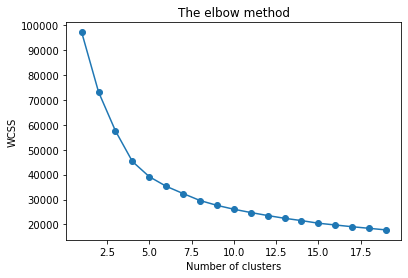

In [41]:
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(principal_cc)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 20), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Dapat dilihat menggunakan elbow method bahwa jumlah cluster yang optimum antara 5 sampai 7. Maka, akan dicoba menggunakan 5 cluster

In [58]:
scaler = StandardScaler() 
data = scaler.fit_transform(principal_cc)

In [59]:
pd.DataFrame(principal_cc).describe()

,PC_1,PC_2,PC_3,PC_4
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,9.242638e-16,8.019035e-16,-5.083457e-17,-1.935882e-16
std,2.154327e+00,1.858421e+00,1.224095e+00,1.127680e+00
min,-2.781003e+00,-2.679952e+00,-9.886715e+00,-1.112367e+01
25%,-1.484081e+00,-1.264115e+00,-7.712438e-01,-6.250642e-01
50%,-4.554402e-01,-4.860406e-01,5.070197e-02,1.343983e-01
75%,7.621886e-01,7.387883e-01,5.595894e-01,7.046295e-01
max,2.960305e+01,2.537036e+01,1.692524e+01,1.390419e+01


In [60]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(principal_cc)
pred = kmeans.predict(principal_cc)

In [61]:
frame = pd.DataFrame(principal_cc)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    3928
1    3052
4    1202
2     738
3      30
Name: cluster, dtype: int64

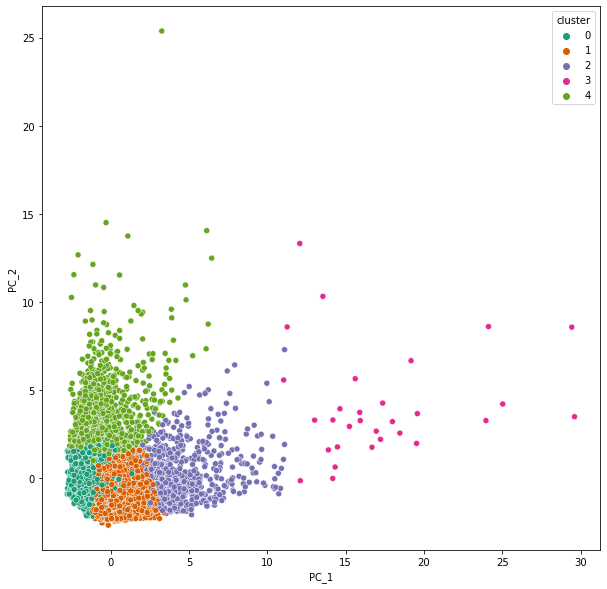

In [65]:
# Membuat visualisasi klaster
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="PC_1", y="PC_2", hue = "cluster", data = frame,
                     palette = 'Dark2')
plt.show()

In [74]:
df_frame = pd.concat([df_cc, frame.iloc[:, 4]], axis='columns')

<AxesSubplot:xlabel='Pembelian', ylabel='Pembayaran'>

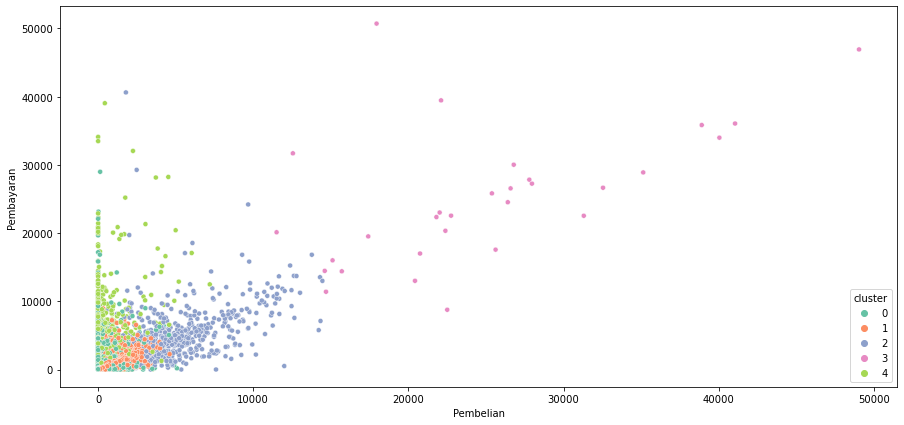

In [83]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_frame, x='Pembelian', y='Pembayaran', hue = 'cluster', s=25, palette="Set2")

<AxesSubplot:xlabel='Pembelian', ylabel='Saldo'>

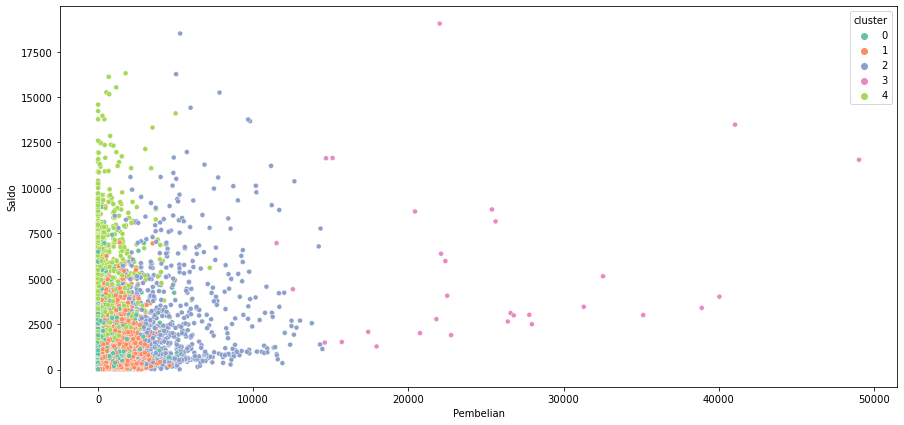

In [87]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_frame, x='Pembelian', y='Saldo', hue = 'cluster', s=25, palette="Set2")

In [89]:
df_frame.shape

(8950, 18)

In [91]:
various_df = df_frame.iloc[:, [0,2,3,4,5,13,17]]

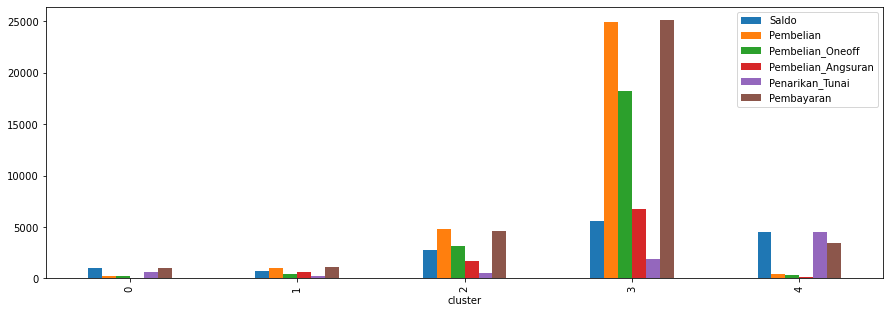

In [92]:
various_df.groupby('cluster').mean().plot.bar(figsize=(15, 5))
plt.show()

In [93]:
df_frame_without_3 = df_frame.copy()

In [96]:
df_frame_without_3 = df_frame_without_3[df_frame_without_3['cluster'].isin([0,1,2,4])]

In [98]:
various_df_without_3 = df_frame_without_3.iloc[:, [0,2,3,4,5,13,17]]

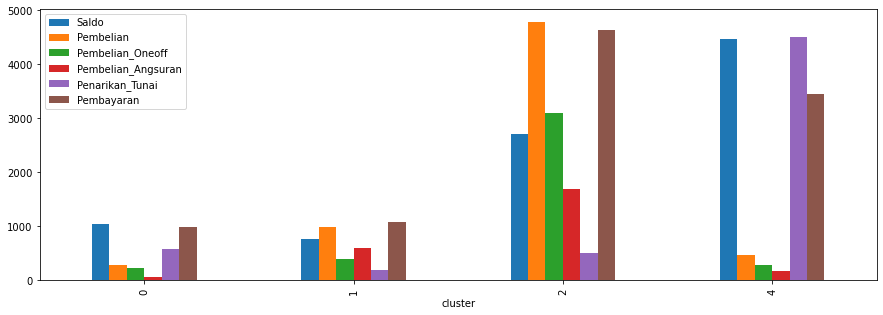

In [99]:
various_df_without_3.groupby('cluster').mean().plot.bar(figsize=(15, 5))
plt.show()